### 8. 비선형 분류모형3 : SVM

In [1]:
##패키지 로드
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
##iris 데이터 로드
iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns = iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({1:"versicolor",0:"setosa",2:"virginica"}) ##타깃을 인코딩
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
## 밑의 'linear'를 변경해서 모델을 다르게 학습시킬 수 있다.

clf = svm.SVC(kernel = 'linear') ###SVM Classifier 로드


import matplotlib.colors as colors
df1 = iris_frame[["sepal length (cm)","sepal width (cm)","target"]]
X= df1.iloc[:,0:2]
Y= df1.iloc[:,2].replace({'setosa' : 0,
                          'versicolor':1,
                          'virginica':2}).copy()
clf.fit(X,Y)

SVC(kernel='linear')

C:\Users\User\anaconda3\envs\machinelearning\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


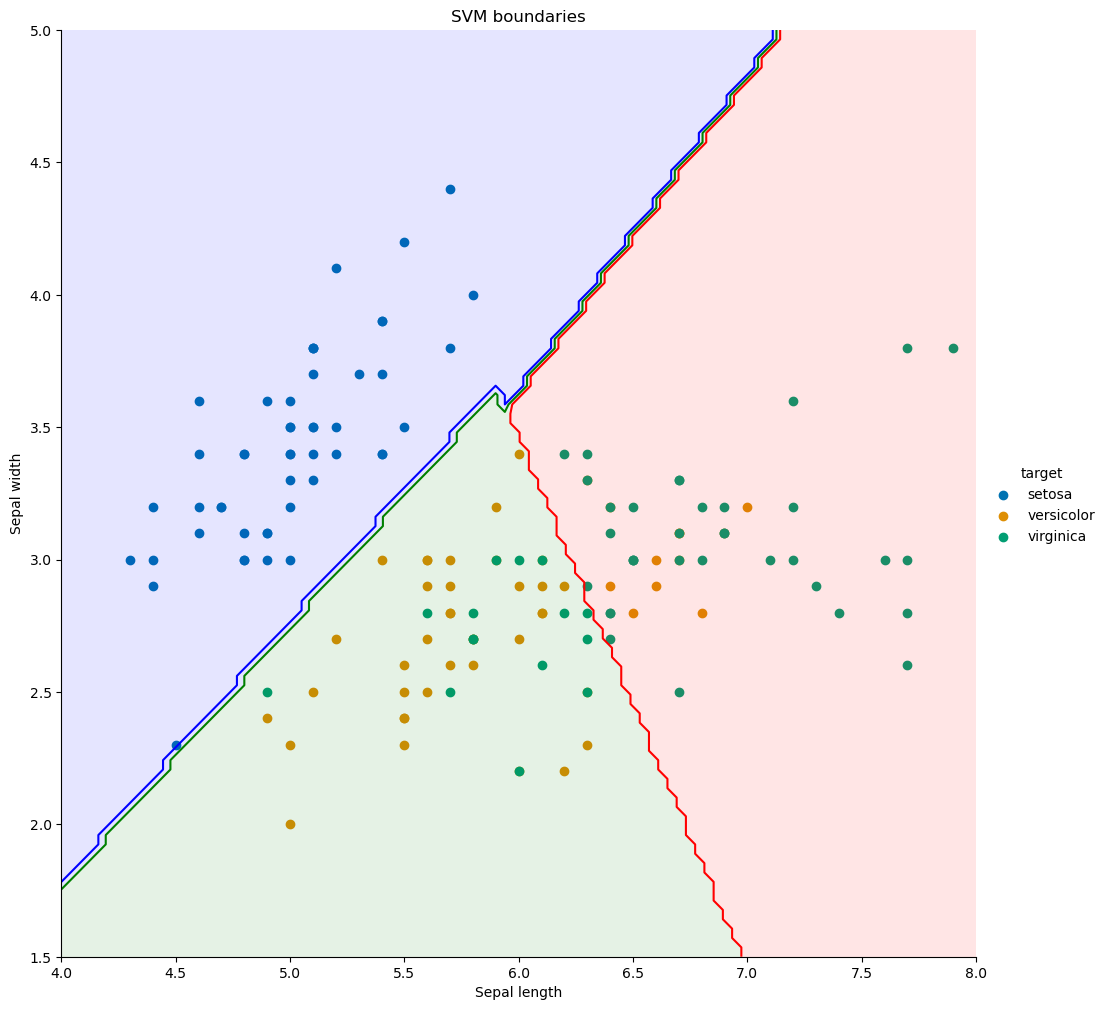

In [4]:
import seaborn as sn

N = 100
X_ = np.linspace(4,8, N)
Y_ = np.linspace(1.5,5, N)
X_,Y_=np.meshgrid(X_, Y_)
color_list = ["Blues, Greens, Reds"]
my_norm = colors.Normalize(vmin = -1, vmax = 1.)
g = sn.FacetGrid(iris_frame,hue = "target", 
                 size= 10, 
                 palette = "colorblind").map(plt.scatter, 
                                             "sepal length (cm)",
                                            "sepal width (cm)",).add_legend()

my_ax = g.ax
zz =  np.array( [clf.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))])
Z = zz.reshape(X_.shape)
my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('SVM boundaries')


plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 40, centers = 2, random_state = 20) ##데이터셋 생성
clf = svm.SVC(kernel = 'linear') ##svm 불러오기
clf.fit(X,y) ##fitting

SVC(kernel='linear')

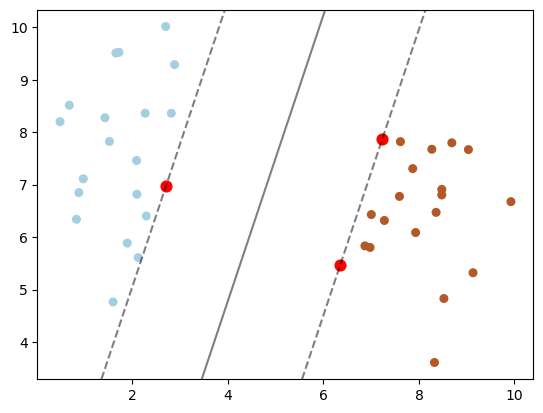

In [7]:
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap = plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX =np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', 
           levels = [-1,0,1],
           alpha = 0.5, 
           linestyles = ['--', '-','--'])
##서포트 벡터 표현
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()


In [8]:
##커널 변경
clf = svm.SVC(kernel = 'rbf')
clf.fit(X,y)

SVC()

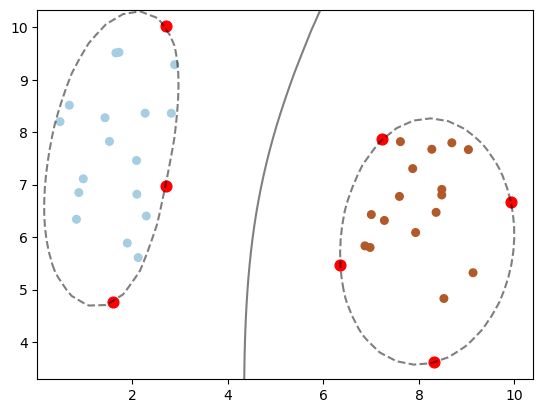

SVC()

In [9]:
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap = plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX =np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', 
           levels = [-1,0,1],
           alpha = 0.5, 
           linestyles = ['--', '-','--'])
##서포트 벡터 표현
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()
##커널 변경
clf = svm.SVC(kernel = 'rbf')
clf.fit(X,y)

### 9. 군집화

In [10]:
#### digit 데이터 클러스터링

In [11]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [12]:
digits=load_digits()
n_image = 20

np.random.seed(0)

idx = np.random.choice(range(len(digits.images)), n_image)
X = digits.data[idx]
images = digits.images[idx]
plt.figure(figsize= (12,1))

for i in range(n_image):
    plt.subplot(1, n_image, i+1)
    plt.imshow(images[i], cmap=plt.cm.bone)
    plt.grid(False)
    plt.xticks(())
    plt.yticks(())
    plt.title(i)
    
    

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X, 'ward')
Z

array([[ 3.        , 18.        , 23.51595203,  2.        ],
       [13.        , 19.        , 25.27844932,  2.        ],
       [ 1.        , 14.        , 28.67054237,  2.        ],
       [17.        , 21.        , 31.04298096,  3.        ],
       [ 4.        ,  7.        , 31.51190251,  2.        ],
       [ 6.        ,  8.        , 32.54228019,  2.        ],
       [ 9.        , 10.        , 33.36165464,  2.        ],
       [ 0.        , 24.        , 34.51086785,  3.        ],
       [ 2.        , 22.        , 37.03151811,  3.        ],
       [11.        , 26.        , 43.25505751,  3.        ],
       [12.        , 15.        , 45.31004304,  2.        ],
       [16.        , 20.        , 45.36151085,  3.        ],
       [ 5.        , 27.        , 53.54437412,  4.        ],
       [30.        , 32.        , 56.6892112 ,  6.        ],
       [25.        , 29.        , 60.16809786,  5.        ],
       [28.        , 34.        , 66.61618922,  8.        ],
       [31.        , 33.

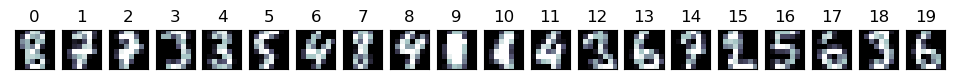

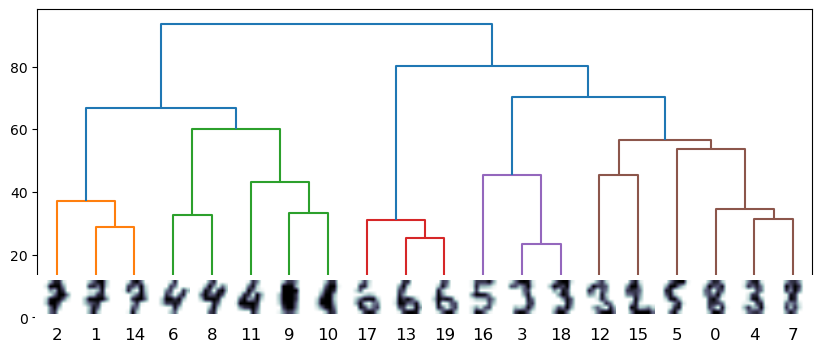

In [14]:
#밑에 import 단에 OffsetImage 중 O,I가 대문자임.

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(10,4))
ax = plt.subplot()

ddata = dendrogram(Z)

dcoord = np.array(ddata['dcoord'])
icoord = np.array(ddata['icoord'])
leaves = np.array(ddata['leaves'])

idx = np.argsort(dcoord[:,2])
dcoord = dcoord[idx,:]
icoord = icoord[idx,:]
idx = np.argsort(Z[:,:2].ravel())
label_pos = icoord[:,1:3].ravel()[idx][:20]

for i in range(20):
    imagebox = OffsetImage(images[i], 
                           cmap = plt.cm.bone_r, 
                           interpolation = 'bilinear',
                          zoom = 3)
    ab = AnnotationBbox(imagebox, (label_pos[i],0),
                       box_alignment=(0.5,-0.1),
                       bboxprops = {"edgecolor" : "none"})
    ax.add_artist(ab)
    
plt.show()

In [15]:
#### IRIS 데이터 클러스터링

In [16]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [17]:
iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns = iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({1:"versicolor",0:"setosa",2:"virginica"})
X = iris_frame.iloc[:,:-1]
Y = iris_frame.iloc[:,[-1]]
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
df1 = iris_frame[["sepal length (cm)" , "sepal width (cm)" ]]
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sn

#모델 생성 및 예측
model = KMeans(n_clusters = 3, algorithm='auto')
model.fit(df1)
predict = pd.DataFrame(model.predict(df1))
predict.columns = ['predict']

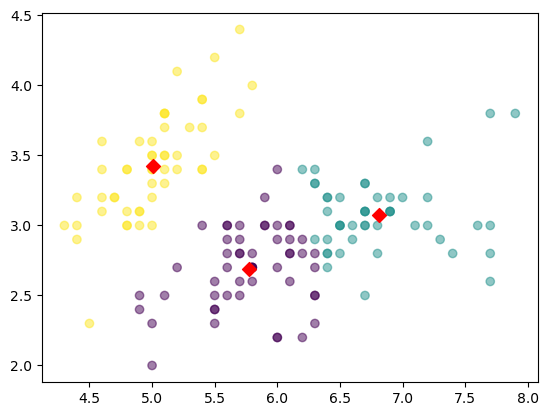

In [19]:
r = pd.concat([df1,predict],axis=1)
plt.scatter(r["sepal length (cm)"] , 
            r["sepal width (cm)" ], 
            c=r['predict'],
                alpha=0.5)

centers = pd.DataFrame(model.cluster_centers_,
                       columns = ["sepal length (cm)" , "sepal width (cm)" ])

center_x = centers["sepal length (cm)"]
center_y = centers["sepal width (cm)"]
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

C:\Users\User\anaconda3\envs\machinelearning\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


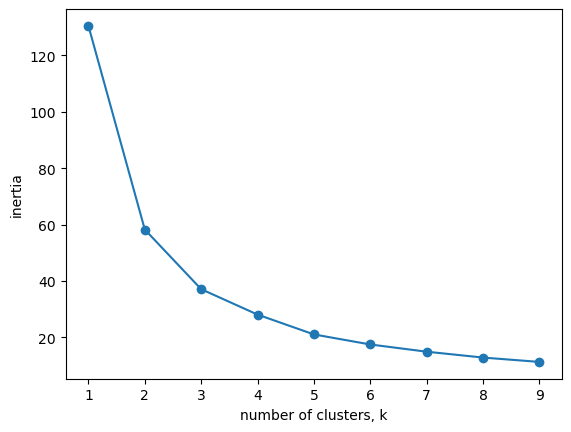

In [20]:
ks = range(1,10)
iner=[]

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df1)
    iner.append(model.inertia_)
plt.plot(ks,iner,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()